In [1]:
#import datasets and useful library

!wget 'https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv'

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
from sklearn.decomposition import PCA 
from sklearn import preprocessing

--2020-06-04 12:47:52--  https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘assignment_shala_clustering.csv.1’

assignment_shala_cl 100%[===================>]   3.89K  --.-KB/s    in 0s      

2020-06-04 12:47:52 (71.2 MB/s) - ‘assignment_shala_clustering.csv.1’ saved [3981/3981]



In [2]:
data = pd.read_csv('assignment_shala_clustering.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60d1c62390>,
      dtype=object)

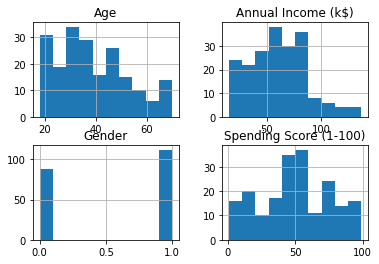

In [3]:
#data preprocessing and visulization
data=data.drop(columns=['CustomerID'])
data['Gender']=data['Gender'].apply(lambda x : 0 if x=='Male' else 1)
data.hist()

In [0]:
norm_data = preprocessing.scale(data,axis=0)    #standerdization of data


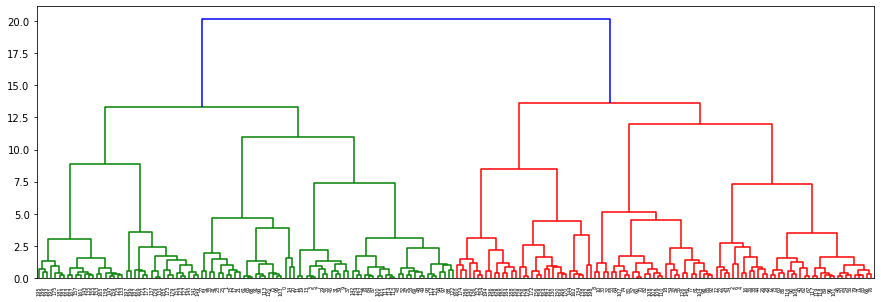

In [5]:
fig = plt.figure(figsize=(15,5))
ddg=sch.dendrogram(sch.linkage(norm_data,method='ward'))

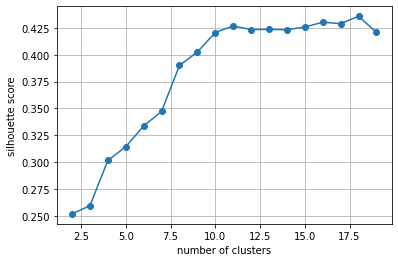

In [6]:
#nchoosing best number of clusters for kmeans
score=np.empty(20)

for i in range(2,20,1):
  kmeans=KMeans(n_clusters=i,random_state=21).fit(norm_data)
  score[i]=silhouette_score(norm_data,kmeans.labels_)                    #silhouette score

plt.plot(np.arange(2,20),score[2:20],'o-')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid()

In [0]:
#according to graph scrore is not increasing much after 11 cluster
N_CLUSTERS = 11
kmeans=KMeans(n_clusters=N_CLUSTERS,random_state=21)
labels=kmeans.fit_predict(norm_data)
centers=kmeans.cluster_centers_


Text(0.5, 0, 'Annual Income (k$)')

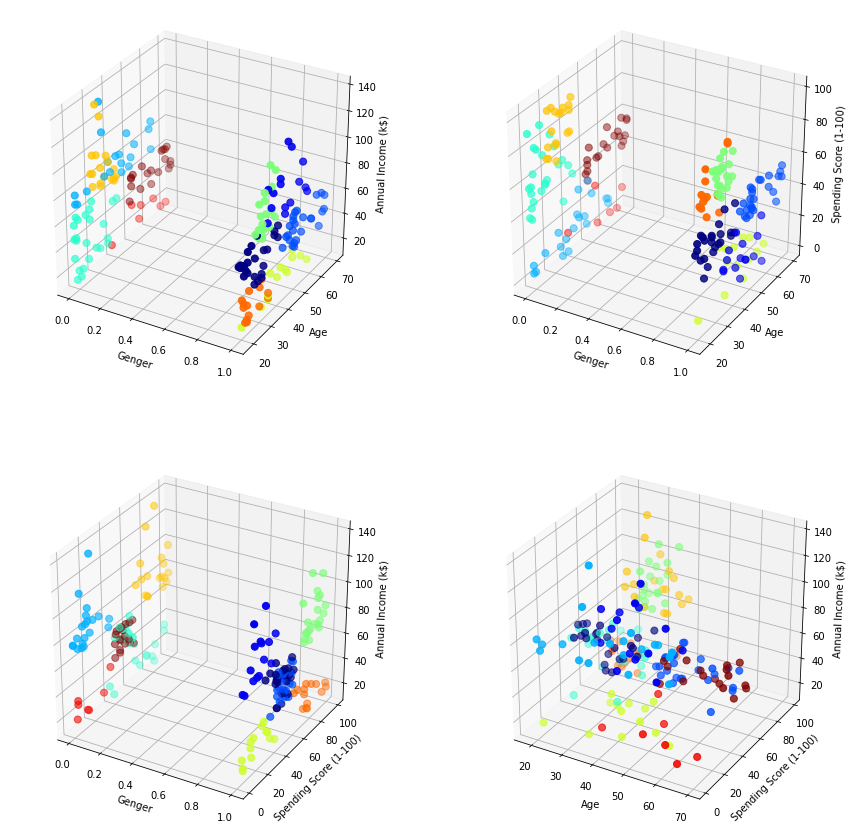

In [8]:
fig = plt.figure(figsize=(15,15))


ax = fig.add_subplot(221, projection='3d')
scat = ax.scatter(data['Gender'],data['Age'],data['Annual Income (k$)'],c=labels,cmap='jet',s=50)
ax.set_xlabel('Genger')
ax.set_ylabel('Age')
ax.set_zlabel('Annual Income (k$)')

ax = fig.add_subplot(222, projection='3d')
scat = ax.scatter(data['Gender'],data['Age'],data['Spending Score (1-100)'],c=labels,cmap='jet',s=50)
ax.set_xlabel('Genger')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')

ax = fig.add_subplot(223, projection='3d')
scat = ax.scatter(data['Gender'],data['Spending Score (1-100)'],data['Annual Income (k$)'],c=labels,cmap='jet',s=50)
ax.set_xlabel('Genger')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

ax = fig.add_subplot(224, projection='3d')
scat = ax.scatter(data['Age'],data['Spending Score (1-100)'],data['Annual Income (k$)'],c=labels,cmap='jet',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')

Text(0.5, 0, 'Annual Income (k$)')

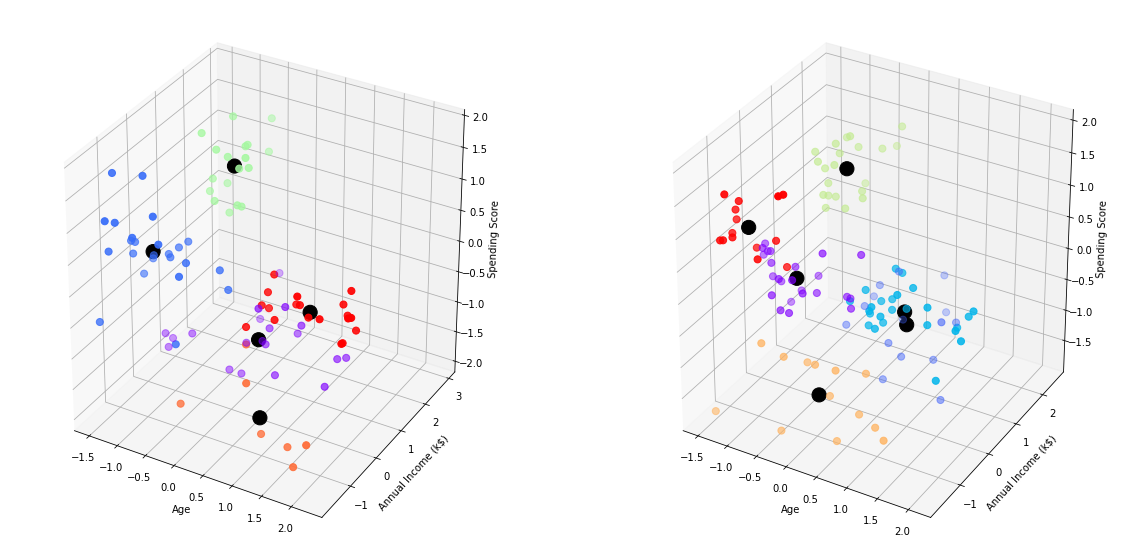

In [9]:
male_data   = norm_data[norm_data[:,0]<0, :]
female_data = norm_data[norm_data[:,0]>0, :]

male_c   = centers[centers[:,0]<0, :]
female_c = centers[centers[:,0]>0, :]

label_m=kmeans.predict(male_data)
label_f=kmeans.predict(female_data)


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(male_data[:,1],male_data[:,2],male_data[:,3],c=label_m,cmap ='rainbow',s=50)
ax.scatter(male_c[:,1],male_c[:,2],male_c[:,3],s=200,c='black',alpha=1)
ax.set_zlabel('Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(female_data[:,1],female_data[:,2],female_data[:,3],c=label_f,cmap ='rainbow',s=50)
ax.scatter(female_c[:,1],female_c[:,2],female_c[:,3],s=200,c='black',alpha=1)
ax.set_zlabel('Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')

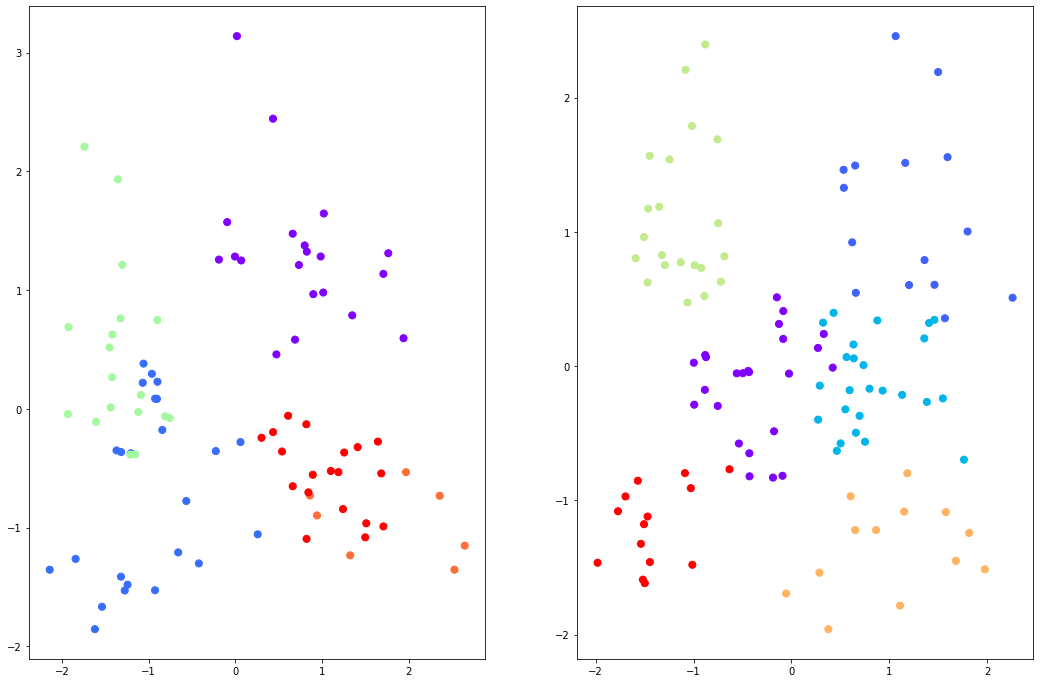

In [11]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(male_data[:,1:])        #3D data of male
X_principal_m = pd.DataFrame(X_principal) 
X_principal_m.columns = ['P1', 'P2'] 

X_principal = pca.fit_transform(female_data[:,1:])        #3D data of male
X_principal_f = pd.DataFrame(X_principal) 
X_principal_f.columns = ['P1', 'P2'] 


fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(121)
plt.scatter(X_principal_m['P1'],X_principal_m['P2'],c=label_m,cmap ='rainbow',s=50)
ax = fig.add_subplot(122)
plt.scatter(X_principal_f['P1'],X_principal_f['P2'],c=label_f,cmap ='rainbow',s=50)




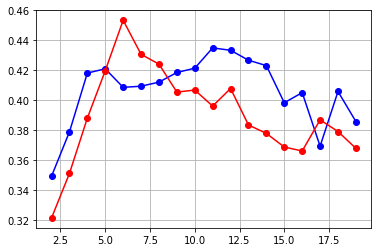

In [12]:
score_m=np.empty(20)
score_f=np.empty(20)

for i in range(2,20,1):
  kmeans_m=KMeans(n_clusters=i,random_state=21)
  labels_m=kmeans_m.fit_predict(male_data[:,1:])
  score_m[i]=silhouette_score(male_data[:,1:],kmeans_m.labels_)

  kmeans_f=KMeans(n_clusters=i,random_state=21)
  labels_f=kmeans_f.fit_predict(female_data[:,1:])
  score_f[i]=silhouette_score(female_data[:,1:],kmeans_f.labels_)
 
plt.plot(np.arange(2,20),score_m[2:20],'o-',c='blue')
plt.plot(np.arange(2,20),score_f[2:20],'o-',c='red')
plt.grid()

male classes = 5
female classes = 5


Text(0.5, 0, 'Annual Income')

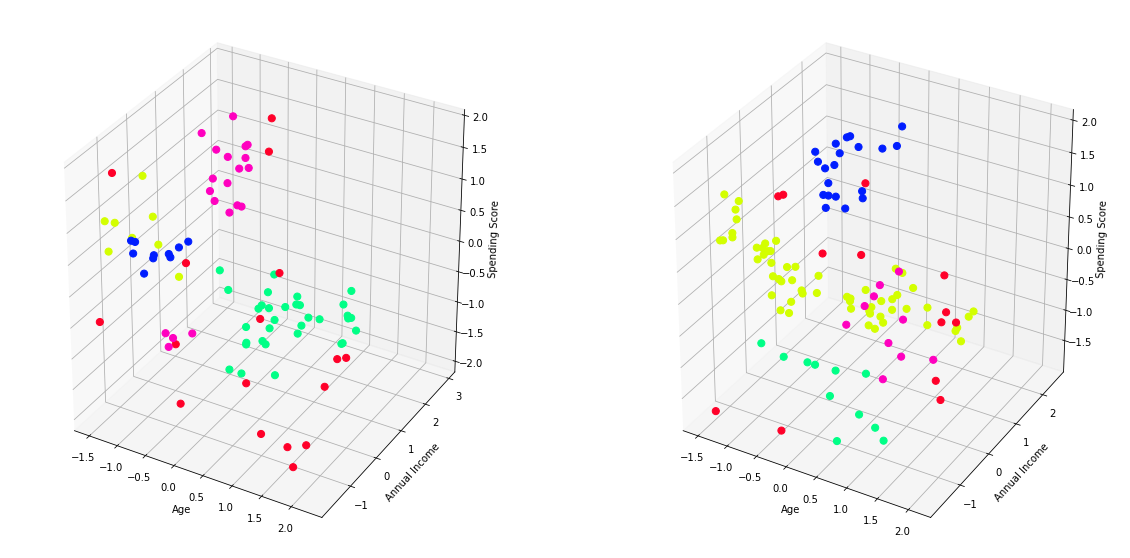

In [13]:
from sklearn.cluster import DBSCAN

clustering_m = DBSCAN(eps=0.7, min_samples=4).fit(male_data[:,1:])
labels_m=clustering_m.labels_+1


clustering_f = DBSCAN(eps=0.6, min_samples=3).fit(female_data[:,1:])
labels_f=clustering_f.labels_+1


#cmap = plt.cm.nipy_spectral
cmap = plt.cm.gist_rainbow
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121, projection='3d')
N_CLUSTERS=max(labels_m)
N_CLUSTERS=max(N_CLUSTERS,2)
print('male classes =',N_CLUSTERS)
bounds = np.linspace(0,N_CLUSTERS,N_CLUSTERS+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
ax.scatter(male_data[:,1],male_data[:,2],male_data[:,3],c=labels_m,cmap=cmap,norm=norm,s=50,alpha=1)
ax.set_zlabel('Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')

ax = fig.add_subplot(122, projection='3d')
N_CLUSTERS=max(labels_f)
N_CLUSTERS=max(N_CLUSTERS,2)
print('female classes =',N_CLUSTERS)
bounds = np.linspace(0,N_CLUSTERS,N_CLUSTERS+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
ax.scatter(female_data[:,1],female_data[:,2],female_data[:,3],c=labels_f,cmap=cmap,norm=norm,s=50,alpha=1)
ax.set_zlabel('Spending Score')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')

#red are unlabeled data(outliers)